# 1. Gradient Descent 


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

In [80]:
def grad_1(x):
    
    return 2*x + 3 #derivative of x^2 + 3x+4

def grad_2(x):
    return 4*x**3 - 6*x + 2 #derivative of x^4 -3x^2 + 2x

def f1(x): 
    return x**2 +3*x +4 

def f2(x):
    return 4*x**3 - 6*x +2

$ f1(x)=x^2 + 3x +4 $<br/>
$ f1^{'}(x)= 2x +3 $<br/>

$ f2(x) = x^4 - 3x^2 +2x $<br/>
$ f2^{'}(x)= 4x^3 - 6x +2 $

In [81]:
def gradient_descent(gradient,init_,learn_rate,n_itr=50,tol=1e-06):
    x=init_
    
    for _ in range(n_itr):
        delta=-learn_rate*gradient(x)
        if np.all(np.abs(delta)<=tol):
            break
        #Updating parameters in the direction opp. to the gradient so that the function approaches the minima value
        x+=delta
    return round(x*1000)/1000

In [82]:
#initial value of x set to 0
#Printing the approximate minima of the function using x we found using gradient descent

x1,x2=gradient_descent(grad_1,0,0.01,500),gradient_descent(grad_2,0,0.01,500)
print(x1,f1(x1)) 
print(x2,f2(x2))

-1.5 1.75
-1.366 0.0004164159999984207


### Minima of $ x^{2} + 3x +4 $ is (-1.5, 1.75)
### Minima of $ x^4 - 3x^2 +2x $ is (-1.366, 0.0004164159999984207)

In [83]:
def grad_a(a,b,X,Y,n):
    
    return (-2/n)*np.dot(X,(Y - a*X - b)) #Derivative of mean((Y-Y_pred)^2) w.r.t "a"

def grad_b(a,b,X,Y,n):
    
    return (-2/n)*np.sum(Y - a*X - b) #Derivative of mean((Y-Y_pred)^2) w.r.t "b"
    
    
def loss_LR(X,Y,a,b):
    return (1/Y.shape[0])*np.sum((Y- a*X - b)**2) #Mean square loss function for Linear regression
 

#Gradient descent function for Linear regression which takes 2 different gradient functions as I/P parameters as we need to find
#derivative w.r.t 2 parameters namely a,b
def gradient_descent_LR(X,Y,gradient1,gradient2,init_,learn_rate,n_itr=50,tol=1e-06):
    a,b=init_,init_
    
    #We'll collect values of A,B, Loss so that they can be used later to plot a Loss curve
    A.append(a)
    B.append(b)
    Loss_itr.append(loss_LR(X,Y,a,b)) 
    for _ in range(n_itr):
        
        delta1=-learn_rate*gradient1(a,b,X,Y,Y.shape[0]) 
        delta2=-learn_rate*gradient2(a,b,X,Y,Y.shape[0])
        if np.all(np.abs(delta1)<=tol) and np.all(np.abs(delta2)<=tol):
            break
            
        #Updating parameters in the direction opp. to the gradient so that the function approaches the minima value
        a+=delta1
        b+=delta2
        A.append(a)
        B.append(b)
        Loss_itr.append(loss_LR(X,Y,a,b))
        
    return [round(a*1000)/1000,round(b*1000)/1000]




### Gradient_descent_LR() is slightly modified form of gradient descent function tailor fitted for Linear Regression

$ Loss(L) = \frac{1}{n} \Sigma_{i=1}^{n} (y_i - ax_i - b)^2 $

$ \frac{\partial L}{\partial a}= \frac{-2}{n} \Sigma_{i=1}^{n}x_i(y_i - ax_i -b) $

$ \frac{\partial L}{\partial b}= \frac{-2}{n} \Sigma_{i=1}^{n}(y_i - ax_i -b) $

0.295 2.022
2.218724695885997


<Figure size 432x288 with 0 Axes>

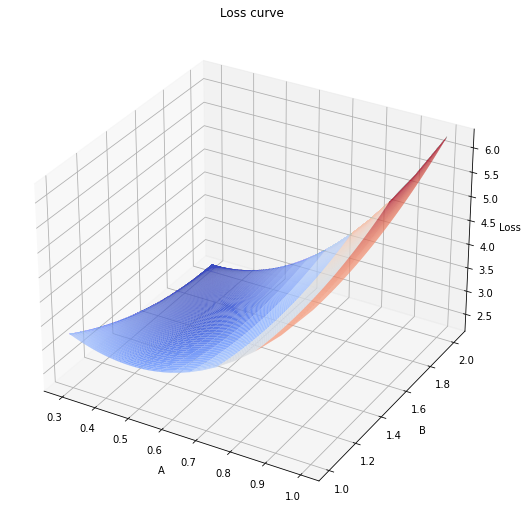

In [84]:
np.random.seed(0)
A=[]
B=[]

#Generating data with mean 1.5, std 2.5
X=2.5*np.random.randn(10000) +1.5
res=1.5*np.random.randn(10000)
Y=2 + 0.3*X +res
Loss_itr=[]

#gradient_descent_LR function returns optimal value for parameters a,b as a tuple
a,b=gradient_descent_LR(X,Y,grad_a,grad_b,1,0.01,500)
print(a,b)
print(loss_LR(X,Y,a,b))

 


fig = plt.figure()
A,B=np.meshgrid(A,B) #Converting 1D vectors A,B to 2D matrices by stacking them together

Loss = np.array([loss_LR(X,Y,a, b) 
               for a, b in zip(np.ravel(A), np.ravel(B))]) #calculating loss for diff parameter values a,b and storing it

Loss = Loss.reshape(A.shape) #Reshaping Loss vector to the shape of A, i.e. converting it to 2D



fig = plt.figure(figsize =(14, 9)) #Setting figure dimensions
ax = plt.axes(projection ='3d')
ax.plot_surface(A, B, Loss,cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

ax.set_title('Loss curve')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
plt.show()


### a=0.295, b=2.022 are found to be the optimal value of parameters at learning rate=0.01 & iterations=500 for batch gradient descent

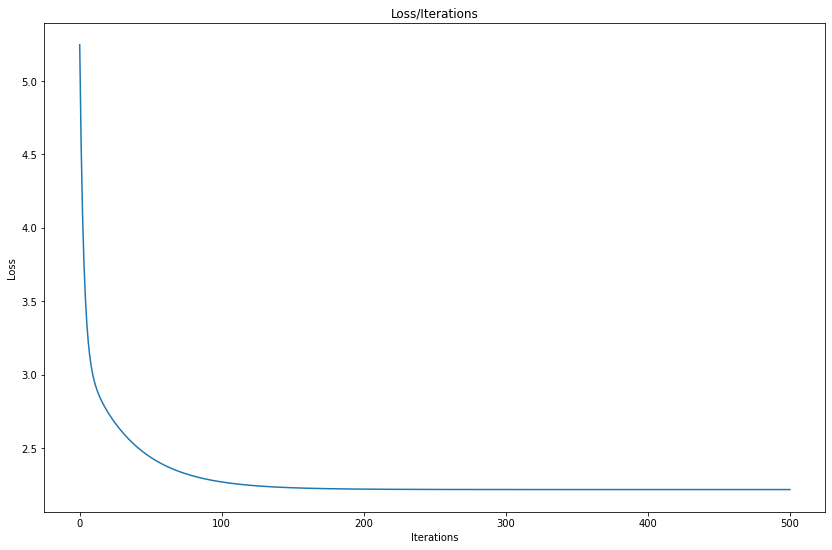

In [159]:
fig = plt.figure(figsize =(14, 9))
plt.plot(Loss_itr)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.title('Loss/Epoch')
plt.show()

In [145]:

#Function to create mini bactches with a specific batch size
def create_mini_batches(X, Y, batch_size):
    mini_batches = []
    
    data = np.stack((X, Y),axis=1) #stacking features and outputs to create the entire dataset
    
    np.random.shuffle(data) #shuffling data to introduce randomness in mini_batches
    
    mini_batch = data[0:batch_size, :] 
    X_mini = mini_batch[:, :-1].reshape(-1,)
    Y_mini = mini_batch[:, -1]
        
   
        
   
    return X_mini,Y_mini

#Gradient descent function modified to be used in mini batches
def mini_batch_LR(X,Y,gradient1,gradient2,init_,learn_rate,batch_size,n_itr=50,tol=1e-06):
    a,b=init_,init_
    
    A=[]
    B=[]
    A.append(a)
    B.append(b)
    Loss_itr1.append(loss_LR(X,Y,a,b))
    for _ in range(n_itr): #Iterating n_itr times
        
        mini_batches=create_mini_batches(X,Y,batch_size) #Creating mini batches of the specific batch_size
        
       
        X_min,Y_min=mini_batches
            
        grad1=gradient1(a,b,X_min,Y_min,Y_min.shape[0]) #Gradient w.r.t a
        grad2=gradient2(a,b,X_min,Y_min,Y_min.shape[0]) #Gradient w.r.t b
        delta1=-learn_rate*grad1
        delta2=-learn_rate*grad2
            
        a+=delta1 #Updating a
        b+=delta2 #Updating b
            
                
        if np.all(np.abs(delta1)<=tol) and np.all(np.abs(delta2)<=tol):
                break   
       
        Loss_itr1.append(loss_LR(X,Y,a,b)) #Collecting the losses per epoch to be plotted later
        
    
    return (a,b)




In [151]:
Loss_itr1=[]
batch_size=512


print(mini_batch_LR(X,Y,grad_a,grad_b,1,0.001,batch_size, 10000))



(0.29886890194619564, 2.0171726337920113)


### a $\approx$ 0.3, b $\approx$2.0 at batch_size=512, iterations=10k and learn_rate=0.001 for minibatch gradient descent

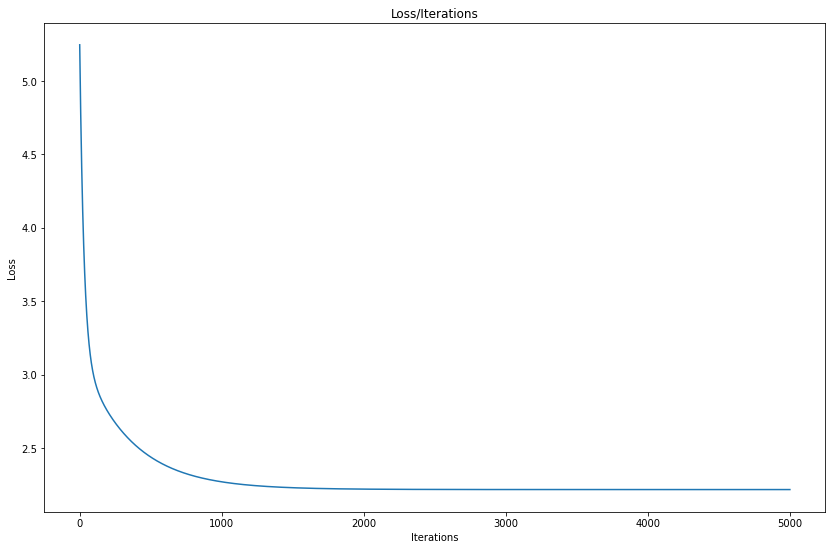

In [160]:
fig = plt.figure(figsize =(14, 9))
plt.plot(Loss_itr1)
plt.xlabel('Iterations') 
plt.ylabel('Loss')
plt.title('Loss/Iterations')
plt.show()

1
512
1024
10000


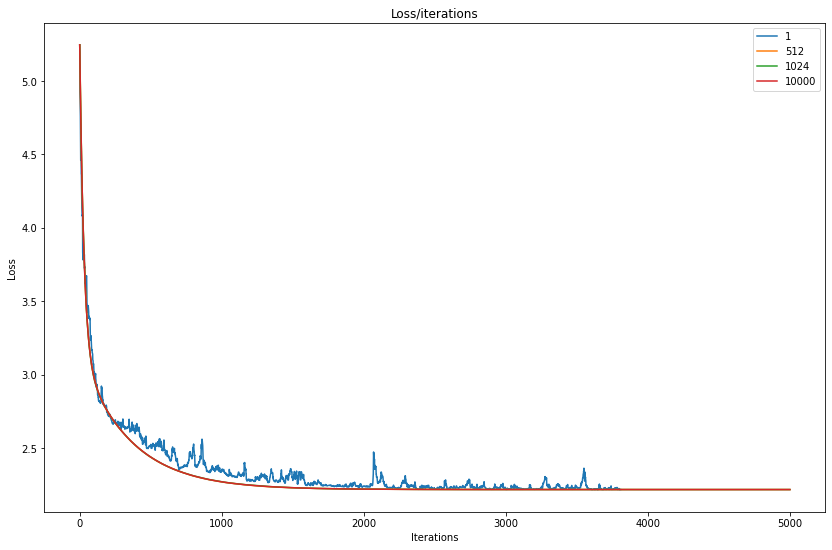

In [156]:
batches=[2**i for i in range(0,14)] #batch sizes in powers of 2 for performance gains
batches.append(10000)
loss_batch=[]

time_taken=[]


fig = plt.figure(figsize =(14, 9))

#We iterate over all the batches for 5k iterations 
for i in batches:
    Loss_itr1=[]
    begin=time.time()
    a,b=mini_batch_LR(X,Y,grad_a,grad_b,1,0.001,i,5000) #the function returns values of a,b which are used to fit the linear regressor
    end=time.time()
    time_taken.append(end-begin)
    loss_batch.append(loss_LR(X,Y,a,b))
    
    if(i==1 or i==1024 or i==512 or i==10000): #plotting the graph for sgd, batch and 2 minibatches to get the comparative picture
        print(i)
        plt.plot(Loss_itr1)
 


batch=[1,512, 1024,10000]

plt.legend(batch)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss/Iterations')
plt.show()
    



<b> Other than the noisy SGD which displays some variations, both minibatch and batch gradient descent converges at almost the same rate </b>

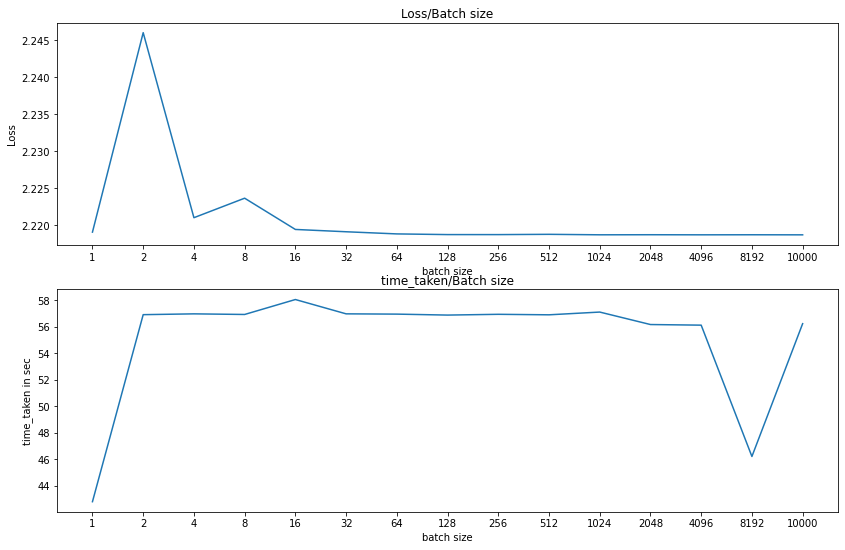

In [157]:
fig = plt.figure(figsize =(14, 9))
plt.subplot(2,1,1)
plt.plot(loss_batch)
plt.xticks(np.arange(len(batches)),labels=batches)
plt.xlabel('batch size') 
plt.ylabel('Loss')
plt.title('Loss/Batch size')
plt.subplot(2,1,2)
plt.plot(time_taken)
plt.xticks(np.arange(len(batches)),labels=batches)
plt.xlabel('batch size') 
plt.ylabel('time_taken in sec')
plt.title('time_taken/Batch size')

plt.show()

<b> No. of iterations=5k, Learning_rate=0.001<br/>
    From the above loss curve it's evident that the mini-batch loss is minimum when the batch size $ \geq $64, time taken takes a dip at batch_size = 8192, so overall 8192 seems like a good batch size which gives optimal performance(min loss) as well as minimum time. However if runtime memory is limited or is constrained, we can go for a lower batch size and still have the same performance in terms of loss, with some increase in time taken. Changing learning rate and number of iterations will have further effect on the above curves.</b>



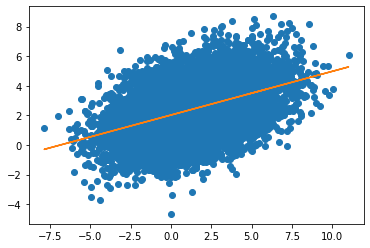

In [158]:
plt.plot(X, Y, 'o') #Creates Scatter plot
plt.plot(X, a*X +b) #Plots the line for the dataset
plt.show()

## Notations ##

<ul>
    <li>C=Cold</li>
    <li>F=Fever</li>
    <li>LD=Lung Disease</li>
    <li>Co= Cough</li>
    <li> $ ^c $ = Complement of an event </li>
</ul>

## Q2 (a) ##
$ P(C,F)=P(F/C)P(C) $ <br/>
$ P(C,F)=0.307*0.02 $ <br/>
$ P(C,F)=6.14\times 10^{-3}=0.00614 $



## Q2(b) ##
$ P(LD)=P(LD/S)P(S) + P(LD/S^c)P(S^c) $ <br/>
$ P(LD)=0.1009*0.2 + 0.001*0.8 $ <br/>
$ P(LD)=0.02098 $ <br/>
$ P(LD^c)=0.97902 $ <br/>
$ P(C/Co)=\frac{P(Co,C)}{P(Co)} $ <br/>
$ P(C/Co)=\frac{P(Co,C,LD)+P(Co,C,LD^c)}{P(Co,LD,C)+P(Co,LD,C^c)+P(Co,LD^c,C)+P(Co,LD^c,C^c)} $ <br/>
$ P(C/Co)=\frac{P(Co|C,LD)P(C,LD)+P(Co|C,LD^c)P(C, LD^c)}{P(Co|LD,C)P(LD,C)+P(Co|LD,C^c)P(LD,C^c)+P(Co|LD^c,C)P(LD^c,C)+P(Co|LD^c,C^c)P(LD^c,C^c)} $ <br/>
$ P(C/Co)=\frac{0.0003+0.0098}{0.0003+0.0103+0.0098+0.0095} $ <br/>
$ P(C/Co)=0.3377 $

## Q3 ##

<ul>
    <li> There are n independent trials.</li>
    <li> Each trial results in one of k-mutually exclusive and exhaustive outcomes.</li>
    <li> On any single trial, these k outcomes occur with probabilities $ p_1,p_2,..p_k $ such that $ \Sigma_{i=1}^{k}p_{i} =1 $</li> 
</ul>

Let the random variable $X_i$ represent number of occurrences of event i.
Then the join probability of $x_1,x_2,...x_k$ has the form:
$ f(X_1=x_1,X_2=x_2,....,X_k=x_k|p_1,p_2,....,p_k) = \binom{n}{x_1,x_2,..,x_k} \prod_{i=1}^{k}p_i^{x_i} $

To find MLE, we try to maximize the above probability function, by tuning the parameters which are all $p_i's$ in this case. Or we try to find the gradient of the function and set it to 0 to find the point of inflection. As it's difficult to differentiate product of terms, we employ a trick to convert product to sums i.e. we convert the function above to a logarithmic function(which is strictly increasing in nature and so the maxima is preserved).<br/>

Log-likelihood of "f" looks like:-
$ l(p_i)=log(f)=log\:n! - \Sigma_{i=1}^{k}log\:x_{i}! + \Sigma_{i=1}^{k}x_i log\:p_i $

As this problem is a constrained optimization problem we can't maximize the function straight away, we've to take into account $ C=\Sigma_{i=1}^{k}p_{i}-1=0 $.

Maxima or minima of the curve under the constraint satisfies 2 properties as follows:
<ol>
    <li> $ \nabla l(p_i)= \lambda*\nabla C $ </li>
    <li> $ C=0 $ </li>
</ol>

Combining both the conditions above we've a new function to maximize $L(p_i,\lambda)$ also called Lagrangian which encapsulates both the conditions.

$ L(p_i,\lambda)=l(p_i)+ \lambda(\Sigma_{i=1}^{n}p_i-1) $ <br/>
or,$ \nabla L(p_i,\lambda)=0 $ <br/>
or,$ \frac{\partial L(p_i,\lambda)}{\partial p_i}=0\: \&\: \frac{\partial L(p_i,\lambda)}{\partial \lambda}=0 $ <br/>
or, $ \lambda p_i =X_i...(i) $ <br/>
$ \Sigma_{i=1}^{n}p_i=1...(ii) $ <br/>

We need to find the value of $ \lambda $ or the lagrange multiplier and substitute it in eqn. (i) to get the estimate for $ p_i $. <br/>

Summing both LHS \& RHS of (i) for all "k" random variables we get:-<br/>
$ \Sigma_{i=1}^{k}\lambda p_i=\Sigma_{i=1}^{k}X_i $ <br/>
or,$ \lambda \Sigma_{i=1}^{k}p_i=\Sigma_{i=1}^{k}X_i...(iii) $ <br/>
or,$ \lambda = n $ <br/>
(By\: substituting\: eqn\: (i) \& (ii)\: into\: (iii)) <br/>
Replacing $\lambda$ in eqn(i) we get:- <br/>
$ p_i=\frac{X_i}{n} $
